In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
# !pip install -r requirements.txt

In [9]:
import datetime
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [12]:
import aedes
from aedes.remote_sensing_utils import df_to_ee_points, generate_random_ee_points
from aedes.remote_sensing_utils import visualize_on_map, get_satellite_measures_from_points
from aedes.automl_utils import perform_clustering
from aedes.osm_utils import initialize_OSM_network, get_OSM_network_data, reverse_geocode_points, reverse_geocode_center_of_geojson

In [4]:
# import ee
# service_account = 'gcp-cirro-xavier-ee@gcp-cirro-xavier.iam.gserviceaccount.com'
# credentials = ee.ServiceAccountCredentials(service_account, 'gcp-cirro-xavier-2158f076a9ef.json')
# ee.Initialize(credentials)

In [13]:
# initialize AEDES
aedes.remote_sensing_utils.initialize()

In [14]:
aoi_geojson = [[
                [120.98976275,14.58936896],
                [121.13383232,14.58936896],
                [121.13383232,14.77641364],
                [120.98976275,14.77641364],
                [120.98976275,14.58936896]
]]

# sample_polygon = [[[120.94625672200004,18.511575597000046],
#                    [120.94704360700007,18.420625793000056],
#                    [120.87035669400007,18.429886047000025],
#                    [120.94625672200004,18.511575597000046]]]
# laguan_aoi_geojson = [[
#                 [121.00197333,13.96948967],
#                 [121.59683223,13.96948967],
#                 [121.59683223,14.56562999],
#                 [121.00197333,14.56562999],
#                 [121.00197333,13.96948967]]]

# cotabato_aoi_geojson = [[[124.1548627939,7.1505616554],
#                          [124.3336516508,7.1505616554],
#                          [124.3336516508,7.2730654185],
#                          [124.1548627939,7.2730654185],
#                          [124.1548627939,7.1505616554]]]



In [16]:
# Sample long lat points and get satellite remote sensing data
points = generate_random_ee_points(aoi_geojson, sample_points=5)
%time satellite_df = get_satellite_measures_from_points(points, aoi_geojson)

clustering_model = perform_clustering(satellite_df, n_clusters=3)
satellite_df['labels'] = pd.Series(clustering_model.labels_)

mapper = visualize_on_map(satellite_df, ignore_labels=[1])


CPU times: user 1.03 s, sys: 88.7 ms, total: 1.11 s
Wall time: 1min 56s


In [17]:
satellite_df.head(10)

,geometry,buffered_geometry,longitude,latitude,ndvi,fapar,ndbi,ndwi,ndmi,aerosol,surface_temperature,precipitation_rate,relative_humidity,labels
0,POINT (121.11160 14.66217),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.111599,14.662168,0.154349,0.000000,-0.009122,-0.156812,0.009122,116.431122,36.436481,0.000001,77.704048,1
1,POINT (121.12419 14.59517),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.124187,14.595171,0.191877,0.047703,-0.076692,-0.117247,0.076692,147.654912,33.343179,0.000001,77.704048,2
2,POINT (121.04999 14.62731),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.049989,14.627311,0.096444,0.000000,-0.027322,-0.076104,0.027322,208.057935,36.603021,0.000001,77.704048,1
3,POINT (121.12382 14.60733),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.123821,14.607332,0.188294,0.052000,-0.068768,-0.124935,0.068768,148.002541,35.082785,0.000001,77.704048,1
4,POINT (121.05697 14.76081),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.056969,14.760809,0.130988,0.032000,-0.038837,-0.101535,0.038837,209.410579,35.887674,0.000002,81.611534,0


In [18]:
rev_geocode_df = reverse_geocode_points(satellite_df)
rev_geocode_df.head()

,geometry,buffered_geometry,longitude,latitude,ndvi,fapar,ndbi,ndwi,ndmi,aerosol,surface_temperature,precipitation_rate,relative_humidity,labels,index,place_id,licence,osm_type,osm_id,lat,lon,display_name,boundingbox,address.road,address.neighbourhood,address.suburb,address.city,address.state_district,address.region,address.postcode,address.country,address.country_code,address.state,address.quarter,address.city_district,address.town,address.county
0,POINT (121.11160 14.66217),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.111599,14.662168,0.154349,0.000000,-0.009122,-0.156812,0.009122,116.431122,36.436481,0.000001,77.704048,1,0,261904892,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,834050748,14.661909021187325,121.11168456695184,"Rajah Soliman, Jem Subdivision, Parang, Mariki...","[14.6612656, 14.6621091, 121.1097809, 121.1122...",Rajah Soliman,Jem Subdivision,Parang,Marikina,Eastern Manila District,Metro Manila,1800,Pilipinas / Philippines,ph,NaN,NaN,NaN,NaN,NaN
1,POINT (121.12419 14.59517),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.124187,14.595171,0.191877,0.047703,-0.076692,-0.117247,0.076692,147.654912,33.343179,0.000001,77.704048,2,0,109507167,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,30618016,14.5950697,121.1242366,"Milford, Muntindilaw, Antipolo, Rizal, Calabar...","[14.5950697, 14.5952768, 121.1242366, 121.1249...",Milford,NaN,Muntindilaw,Antipolo,NaN,Calabarzon,1870,Pilipinas / Philippines,ph,Rizal,NaN,NaN,NaN,NaN
2,POINT (121.04999 14.62731),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.049989,14.627311,0.096444,0.000000,-0.027322,-0.076104,0.027322,208.057935,36.603021,0.000001,77.704048,1,0,95821463,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,4910334,14.62728038345424,121.0499260441498,"St. Mary Street, E. Rodriguez, Cubao, 3rd Dist...","[14.6245965, 14.6283633, 121.0493903, 121.0512...",St. Mary Street,NaN,Cubao,Quezon City,Eastern Manila District,Metro Manila,1102,Pilipinas / Philippines,ph,NaN,E. Rodriguez,3rd District,NaN,NaN
3,POINT (121.12382 14.60733),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.123821,14.607332,0.188294,0.052000,-0.068768,-0.124935,0.068768,148.002541,35.082785,0.000001,77.704048,1,0,218755160,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,557150008,14.607331789789422,121.12380656264595,"Roadlot 3, Tropics 3 Filinvest East Homes, Cai...","[14.6071296, 14.6077751, 121.1238065, 121.1238...",Roadlot 3,Tropics 3 Filinvest East Homes,NaN,NaN,NaN,Calabarzon,1871,Pilipinas / Philippines,ph,Rizal,NaN,NaN,Cainta,NaN
4,POINT (121.05697 14.76081),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.056969,14.760809,0.130988,0.032000,-0.038837,-0.101535,0.038837,209.410579,35.887674,0.000002,81.611534,0,0,108280364,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,28260562,14.7604361,121.0572719,"Barangay 174, Zone 15, Camarin, District 1, Ca...","[14.7604361, 14.7625251, 121.0572719, 121.0592...",NaN,Zone 15,Camarin,NaN,Northern Manila District,Metro Manila,1422,Pilipinas / Philippines,ph,NaN,Barangay 174,District 1,NaN,Caloocan


In [19]:
mapper

In [ ]:
%%time
network = initialize_OSM_network(aoi_geojson)

In [ ]:
%%time
# Hospitals and clinics

final_with_hospital_df, hospital_amenities_df, hospital_count_distance_df = get_OSM_network_data(network,
                     satellite_df,
                     aoi_geojson,
                    ['clinic', 'hospital', 'doctors'],
                    5,
                    5000,
                    show_viz=True)

In [ ]:
%%time
# Water sources

final_with_hospital_with_water_df, hospital_with_water_amenities_df, hospital_with_water_count_distance_df = get_OSM_network_data(network,
                     final_with_hospital_df,
                     aoi_geojson,
                    ['toilets', 'water_point'],
                    5,
                    5000,
                    show_viz=True)

In [ ]:
%%time
# sanitation

sanitation_amenities = ['sanitary_dump_station', 'waste_disposal', 'waste_transfer_station']

final_with_hospital_with_water_san_df, hospital_with_water_san_amenities_df, hospital_with_water_san_count_distance_df = get_OSM_network_data(
                    network,
                    final_with_hospital_with_water_df,
                    aoi_geojson,
                    sanitation_amenities,
                    5,
                    5000,
                    show_viz=True)

In [ ]:
%%time
# Schools

final_with_hospital_with_water_san_school_df, hospital_with_water_san_school_amenities_df, hospital_with_water_san_school_count_distance_df = get_OSM_network_data(
                    network,
                    final_with_hospital_with_water_san_df,
                    aoi_geojson,
                    ['college', 'school', 'university', 'kindergarten'],
                    5,
                    5000,
                    show_viz=True)

In [ ]:
final_with_hospital_with_water_san_school_df.shape

In [ ]:
final_with_hospital_with_water_san_school_df.head()

In [ ]:
final_with_hospital_with_water_san_school_df.info()

In [ ]:
final_with_hospital_with_water_san_school_df.describe()

In [ ]:
final_with_hospital_with_water_san_school_df.to_csv('../../aedes_unicef_2022/dataset/sample_feature_engineered_data.csv', index=False)

In [ ]:
final_with_hospital_with_water_san_school_df.astype(str).to_csv('../../aedes_unicef_2022/dataset/sample_feature_engineered_data_all_str.csv', index=False)

In [ ]:
final_with_hospital_with_water_san_school_df.astype(str).to_json('../../aedes_unicef_2022/dataset/sample_feature_engineered_data.json')

### EDA Ground Truth Data

In [7]:
df = pd.read_excel('clean_dengue_carvajal_2022.xlsx')

In [8]:
df.head()

,YEAR,City,Barangay,WEEK,DC,RH,PRECI,TEMP
0,2016.0,CALOOCAN,CZone 01,Week 01,1.0,81.468009,0.0,25.656598
1,2016.0,CALOOCAN,CZone 01,Week 02,0.0,79.534657,0.0,26.217222
2,2016.0,CALOOCAN,CZone 01,Week 03,0.0,76.406229,0.0,26.190318
3,2016.0,CALOOCAN,CZone 01,Week 04,1.0,74.356110,0.0,24.875711
4,2016.0,CALOOCAN,CZone 01,Week 05,1.0,76.443838,0.0,26.314354


In [9]:
df.shape

(71448, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71448 entries, 0 to 71447
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      71448 non-null  float64
 1   City      71448 non-null  object 
 2   Barangay  71448 non-null  object 
 3   WEEK      71448 non-null  object 
 4   DC        71448 non-null  float64
 5   RH        71448 non-null  float64
 6   PRECI     71448 non-null  float64
 7   TEMP      71448 non-null  float64
dtypes: float64(5), object(3)
memory usage: 4.4+ MB


In [11]:
df.describe()

,YEAR,DC,RH,PRECI,TEMP
count,71448.000000,71448.000000,71448.000000,71448.000000,71448.000000
mean,2017.000000,1.166905,78.851020,37.921465,26.910499
std,0.816502,4.325725,7.278316,46.986498,1.343961
min,2016.000000,0.000000,62.444455,0.000000,22.646220
25%,2016.000000,0.000000,73.536584,0.000000,26.040993
50%,2017.000000,0.000000,80.446277,19.372866,26.754963
75%,2018.000000,1.000000,84.223589,59.271721,27.556346
max,2018.000000,256.000000,94.435978,346.364195,30.889699


In [15]:
df['date_from'] = df[['YEAR', 'WEEK']].apply(lambda x: datetime.datetime.strptime(f"{int(x[0])}-W{int(x[1].split(' ')[-1])}" + '-1', '%G-W%V-%u'), axis=1)
df['date_to'] = df['date_from'].apply(lambda x: x + datetime.timedelta(days=7))
df.head(20)

,YEAR,City,Barangay,WEEK,DC,RH,PRECI,TEMP,date_from,date_to
0,2016.0,CALOOCAN,CZone 01,Week 01,1.0,81.468009,0.000000,25.656598,2016-01-04,2016-01-11
1,2016.0,CALOOCAN,CZone 01,Week 02,0.0,79.534657,0.000000,26.217222,2016-01-11,2016-01-18
2,2016.0,CALOOCAN,CZone 01,Week 03,0.0,76.406229,0.000000,26.190318,2016-01-18,2016-01-25
3,2016.0,CALOOCAN,CZone 01,Week 04,1.0,74.356110,0.000000,24.875711,2016-01-25,2016-02-01
4,2016.0,CALOOCAN,CZone 01,Week 05,1.0,76.443838,0.000000,26.314354,2016-02-01,2016-02-08
5,2016.0,CALOOCAN,CZone 01,Week 06,1.0,74.000681,0.000000,24.589033,2016-02-08,2016-02-15
6,2016.0,CALOOCAN,CZone 01,Week 07,4.0,73.119951,0.000000,25.614363,2016-02-15,2016-02-22
7,2016.0,CALOOCAN,CZone 01,Week 08,2.0,71.345978,0.000000,26.195187,2016-02-22,2016-02-29
8,2016.0,CALOOCAN,CZone 01,Week 09,2.0,71.345978,0.000000,26.195187,2016-02-29,2016-03-07
9,2016.0,CALOOCAN,CZone 01,Week 10,1.0,72.880050,0.000000,27.915885,2016-03-07,2016-03-14


In [16]:
df[['Barangay', 'City']].drop_duplicates()#.to_csv("barangay_city_dengue_data_carvajal_2022.csv", index=False)

,Barangay,City
0,CZone 01,CALOOCAN
52,CZone 02,CALOOCAN
104,CZone 03,CALOOCAN
156,CZone 04,CALOOCAN
208,CZone 05,CALOOCAN
260,CZone 06,CALOOCAN
312,CZone 07,CALOOCAN
364,CZone 08,CALOOCAN
416,CZone 09,CALOOCAN
468,CZone 10,CALOOCAN


In [17]:
df.Barangay.value_counts()

CZone 01                           156
NAGKAISANG NAYON 2                 156
MILAGROSA                          156
MATANDANG BALARA                   156
MASAMBONG                          156
MASAGANA                           156
MARILAG                            156
MARIBLO                            156
MARIANA                            156
MANRESA                            156
MANGGA                             156
MALAYA                             156
MAHARLIKA                          156
LOYOLA HEIGHTS                     156
LOURDES                            156
LIBIS                              156
LAGING HANDA                       156
KRUS NA LIGAS                      156
KRISTONG HARI                      156
KAUNLARAN                          156
KATIPUNAN                          156
KAMUNING                           156
KALUSUGAN                          156
KALIGAYAHAN                        156
IMMACULATE CONCEPCION              156
HORSESHOE                

In [18]:
df.City.value_counts()

QC             22152
MAKATI          5148
VALENZUELA      4992
PASIG           4680
MANDALUYONG     4212
MALABON         3276
SAN JUAN        3276
PASAY           3120
LAS PINAS       3120
TAGUIG          2964
CALOOCAN        2496
PARANAQUE       2496
MARIKINA        2184
MANILA          2184
NAVOTAS         2184
PATEROS         1560
MUNTINLUPA      1404
Name: City, dtype: int64

In [19]:
df.head()

,YEAR,City,Barangay,WEEK,DC,RH,PRECI,TEMP,date_from,date_to
0,2016.0,CALOOCAN,CZone 01,Week 01,1.0,81.468009,0.0,25.656598,2016-01-04,2016-01-11
1,2016.0,CALOOCAN,CZone 01,Week 02,0.0,79.534657,0.0,26.217222,2016-01-11,2016-01-18
2,2016.0,CALOOCAN,CZone 01,Week 03,0.0,76.406229,0.0,26.190318,2016-01-18,2016-01-25
3,2016.0,CALOOCAN,CZone 01,Week 04,1.0,74.356110,0.0,24.875711,2016-01-25,2016-02-01
4,2016.0,CALOOCAN,CZone 01,Week 05,1.0,76.443838,0.0,26.314354,2016-02-01,2016-02-08


### Philhealth Summary Data 

In [20]:
phealth_df = pd.read_csv("philhealthSummary.csv")

In [21]:
phealth_df.head()

,Unnamed: 0,index,Barangay,Date,Age,Address,DenWarn,DenNoWarn,DenSev,HemWarn,HemNoWarn,HemSev,Month,Year,NDWI,lon,lat,FAPAR,ALICIA,AMIHAN,APOLONIO SAMSON,AURORA,BAESA,BAGBAG,BAGONG LIPUNAN NG CRAME,BAGONG PAG-ASA,BAGONG SILANGAN,BAGUMBAYAN,BAGUMBUHAY,BAHAY TORO,BALINGASA,BALONG BATO,BATASAN HILLS,BAYANIHAN,BLUE RIDGE A,BLUE RIDGE B,BOTOCAN,BUNGAD,CAMP AGUINALDO,CAPRI,CENTRAL,CLARO,COMMONWEALTH,CONSTITUTION HILLS,CULIAT,DAMAR,DAMAYAN,DAMAYANG LAGI,DEL MONTE,DIOQUINO ZOBEL,DON MANUEL,DONA IMELDA,DONA JOSEFA,DUYAN-DUYAN,E. RODRIGUEZ,EAST KAMIAS,ESCOPA I,ESCOPA II,ESCOPA III,ESCOPA IV,FAIRVIEW,GULOD,HOLY SPIRIT,HORSESHOE,IMMACULATE CONCEPCION,KALIGAYAHAN,KALUSUGAN,KAMUNING,KATIPUNAN,KAUNLARAN,KRISTONG HARI,KRUS NA LIGAS,LAGING HANDA,LIBIS,LOURDES,LOYOLA HEIGHTS,MAHARLIKA,MALAYA,MANGGA,MANRESA,MARIANA,MARIBLO,MARILAG,MASAGANA,MASAMBONG,MATALAHIB,MATANDANG BALARA,MILAGROSA,N.A.,N.S. AMORANTO,NAGKAISANG NAYON,NAYONG KANLURAN,NOVALICHES PROPER,OBRERO,OLD CAPITOL SITE,PAANG BUNDOK,PAG-IBIG SA NAYON,PALIGSAHAN,PALTOK,PANSOL,PARAISO,PASONG PUTIK PROPER,PASONG TAMO,PAYATAS,PHIL-AM,PINAGKAISAHAN,PINYAHAN,PROJECT 6,QUIRINO 2-A,QUIRINO 2-B,QUIRINO 2-C,QUIRINO 3-A,RAMON MAGSAYSAY,ROXAS,SACRED HEART,SAINT IGNATIUS,SAINT PETER,SALVACION,SAN AGUSTIN,SAN ANTONIO,SAN BARTOLOME,SAN ISIDRO,SAN ISIDRO LABRADOR,SAN JOSE,SAN MARTIN DE PORRES,SAN ROQUE,SAN VICENTE,SANGANDAAN,SANTA CRUZ,SANTA LUCIA,SANTA MONICA,SANTA TERESITA,SANTO CRISTO,SANTO NINO,SANTOL,SAUYO,SIENNA,SIKATUNA VILLAGE,SILANGAN,SOCORRO,SOUTH TRIANGLE,TAGUMPAY,TALAYAN,TALIPAPA,TANDANG SORA,TATALON,TEACHERS VILLAGE EAST,TEACHERS VILLAGE WEST,U.P. CAMPUS,U.P. VILLAGE,UGONG NORTE,UNANG SIGAW,VALENCIA,VASRA,VETERANS VILLAGE,VILLA MARIA CLARA,WEST KAMIAS,WEST TRIANGLE,WHITE PLAINS,Binary,medRisk,highRisk,Name,City,Area,Density,Pop
0,0,0,ALICIA,2016-01,16.0,1,0,0,1,0,0,0,1,2016,-0.048205,121.022904,14.660174,0.183692,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,ALICIA,Quezon City,0.11,58287.19,6411.5909
1,1,1,ALICIA,2016-02,15.0,1,0,0,1,0,0,0,2,2016,-0.055055,121.022904,14.660174,0.158156,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,ALICIA,Quezon City,0.11,58287.19,6411.5909
2,2,2,ALICIA,2016-03,13.0,1,0,0,1,0,0,0,3,2016,-0.048205,121.022904,14.660174,0.183692,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,ALICIA,Quezon City,0.11,58287.19,6411.5909
3,3,3,ALICIA,2016-06,16.0,1,0,0,1,0,0,0,6,2016,-0.051999,121.022904,14.660174,0.101452,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,ALICIA,Quezon City,0.11,58287.19,6411.5909
4,4,4,ALICIA,2016-07,15.0,4,0,0,2,2,0,0,7,2016,-0.106110,121.022904,14.660174,0.165155,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,ALICIA,Quezon City,0.11,58287.19,6411.5909


In [22]:
phealth_df.columns

Index(['Unnamed: 0', 'index', 'Barangay', 'Date', 'Age', 'Address', 'DenWarn',
       'DenNoWarn', 'DenSev', 'HemWarn',
       ...
       'WEST TRIANGLE', 'WHITE PLAINS', 'Binary', 'medRisk', 'highRisk',
       'Name', 'City', 'Area', 'Density', 'Pop'],
      dtype='object', length=167)

In [23]:
ph_trans_df  = phealth_df[['lon', 'lat', 'Date', 'Year', 'Month', 'Name', 'City', 'Binary', 'medRisk', 'highRisk']]
ph_trans_df.head(2)

,lon,lat,Date,Year,Month,Name,City,Binary,medRisk,highRisk
0,121.022904,14.660174,2016-01,2016,1,ALICIA,Quezon City,1,0,0
1,121.022904,14.660174,2016-02,2016,2,ALICIA,Quezon City,1,0,0


In [24]:
ph_trans_df.shape

(4825, 10)

In [25]:
ph_trans_df['date_from'] = pd.to_datetime(ph_trans_df[['Year', "Month"]].assign(DAY=1))

In [26]:
ph_trans_df.head()

,lon,lat,Date,Year,Month,Name,City,Binary,medRisk,highRisk,date_from
0,121.022904,14.660174,2016-01,2016,1,ALICIA,Quezon City,1,0,0,2016-01-01
1,121.022904,14.660174,2016-02,2016,2,ALICIA,Quezon City,1,0,0,2016-02-01
2,121.022904,14.660174,2016-03,2016,3,ALICIA,Quezon City,1,0,0,2016-03-01
3,121.022904,14.660174,2016-06,2016,6,ALICIA,Quezon City,1,0,0,2016-06-01
4,121.022904,14.660174,2016-07,2016,7,ALICIA,Quezon City,1,0,0,2016-07-01


In [27]:
from pandas.tseries.offsets import MonthEnd

ph_trans_df['date_to'] = pd.to_datetime(ph_trans_df['date_from']) + MonthEnd(1)

In [28]:
ph_trans_df.sample(20)

,lon,lat,Date,Year,Month,Name,City,Binary,medRisk,highRisk,date_from,date_to
4215,121.008820,14.634572,2016-05,2016,5,TALAYAN,Quezon City,1,0,0,2016-05-01,2016-05-31
1150,121.001659,14.616622,2018-5,2018,5,DON MANUEL,Quezon City,0,0,0,2018-05-01,2018-05-31
4011,121.001546,14.636007,2018-09,2018,9,SIENNA,Quezon City,1,0,0,2018-09-01,2018-09-30
4263,121.023497,14.682669,2017-04,2017,4,TALIPAPA,Quezon City,1,0,0,2017-04-01,2017-04-30
3383,120.990360,14.626239,2018-6,2018,6,SALVACION,Quezon City,0,0,0,2018-06-01,2018-06-30
1936,120.998429,14.626206,2016-6,2016,6,LOURDES,Quezon City,0,0,0,2016-06-01,2016-06-30
2290,121.005711,14.642030,2018-07,2018,7,MASAMBONG,Quezon City,1,0,0,2018-07-01,2018-07-31
1775,121.030508,14.625055,2018-07,2018,7,KRISTONG HARI,Quezon City,1,0,0,2018-07-01,2018-07-31
3952,121.012365,14.610731,2018-05,2018,5,SANTOL,Quezon City,1,0,0,2018-05-01,2018-05-31
4104,121.056860,14.627921,2018-8,2018,8,SILANGAN,Quezon City,0,0,0,2018-08-01,2018-08-31


In [29]:
%time points = df_to_ee_points(ph_trans_df[['lon', 'lat']].drop_duplicates())
# points.getInfo()

CPU times: user 13.2 ms, sys: 1.29 ms, total: 14.5 ms
Wall time: 13.4 ms


In [31]:
#Convert date ranges to string
ph_trans_df['date_from'] = ph_trans_df['date_from'].dt.date.astype(str)
ph_trans_df['date_to'] = ph_trans_df['date_to'].dt.date.astype(str)

In [32]:
### Get Date Ranges
dates_from = ph_trans_df['date_from'].sort_values().unique()
dates_to = ph_trans_df['date_to'].sort_values().unique()
dates_to

array(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
       '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
       '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
       '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
       '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
       '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
       '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
       '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
       '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
      dtype=object)

### Get Satellite Data

In [33]:
import time

In [36]:
%%time
dfs = []
for i in range(len(dates_from)):
    print(f"Processing {dates_from[i]} to {dates_to[i]}")
    %time temp_df = get_satellite_measures_from_points(points, aoi_geojson, date_from=dates_from[i], date_to=dates_to[i])
    temp_df['date_from'] = dates_from[i]
    temp_df['date_to'] = dates_to[i]
    dfs.append(temp_df)
    time.sleep(60)

Processing 2016-01-01 to 2016-01-31
CPU times: user 16.1 s, sys: 741 ms, total: 16.8 s
Wall time: 15min 29s
Processing 2016-02-01 to 2016-02-29
CPU times: user 16.8 s, sys: 720 ms, total: 17.5 s
Wall time: 15min
Processing 2016-03-01 to 2016-03-31
CPU times: user 16.9 s, sys: 711 ms, total: 17.6 s
Wall time: 15min 17s
Processing 2016-04-01 to 2016-04-30
CPU times: user 16.3 s, sys: 716 ms, total: 17 s
Wall time: 15min 15s
Processing 2016-05-01 to 2016-05-31
CPU times: user 16.8 s, sys: 814 ms, total: 17.7 s
Wall time: 14min 37s
Processing 2016-06-01 to 2016-06-30
CPU times: user 16.8 s, sys: 817 ms, total: 17.7 s
Wall time: 14min 49s
Processing 2016-07-01 to 2016-07-31
CPU times: user 16.7 s, sys: 816 ms, total: 17.5 s
Wall time: 14min 40s
Processing 2016-08-01 to 2016-08-31
CPU times: user 16.8 s, sys: 801 ms, total: 17.6 s
Wall time: 15min
Processing 2016-09-01 to 2016-09-30
CPU times: user 16.9 s, sys: 787 ms, total: 17.7 s
Wall time: 14min 26s
Processing 2016-10-01 to 2016-10-31
CP

EEException: Image.select: Parameter 'input' is required.

Processing 2018-10-01 to 2018-10-31
CPU times: user 17.2 s, sys: 749 ms, total: 17.9 s
Wall time: 15min 20s
Processing 2018-11-01 to 2018-11-30
CPU times: user 17.1 s, sys: 782 ms, total: 17.9 s
Wall time: 15min 45s
Processing 2018-12-01 to 2018-12-31
CPU times: user 16.9 s, sys: 747 ms, total: 17.6 s
Wall time: 15min 58s
CPU times: user 9min 46s, sys: 27.5 s, total: 10min 14s
Wall time: 9h 24min 45s


In [37]:
final_df = pd.concat(dfs)
final_df.head(20)

,geometry,buffered_geometry,longitude,latitude,ndvi,fapar,ndbi,ndwi,ndmi,aerosol,surface_temperature,precipitation_rate,relative_humidity,date_from,date_to
0,POINT (121.02290 14.66017),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.022904,14.660174,0.069105,0.000000,-0.009422,-0.072880,0.009422,224.000000,36.105789,2.139037e-09,75.675377,2016-01-01,2016-01-31
1,POINT (121.06600 14.63222),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.066004,14.632222,0.066082,0.000000,-0.055146,-0.018889,0.055146,213.171717,36.198819,2.139037e-09,75.675377,2016-01-01,2016-01-31
2,POINT (121.00498 14.65407),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.004975,14.654071,0.055391,0.000000,-0.018074,-0.050481,0.018074,202.282472,35.153561,2.139037e-09,75.675377,2016-01-01,2016-01-31
3,POINT (121.00581 14.61618),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.005814,14.616177,0.055817,0.000000,0.000549,-0.068774,-0.000549,218.418485,33.871211,2.139037e-09,75.675377,2016-01-01,2016-01-31
4,POINT (121.01118 14.66738),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.011184,14.667379,0.068396,0.000000,-0.016990,-0.065336,0.016990,224.000000,35.266201,2.139037e-09,75.675377,2016-01-01,2016-01-31
5,POINT (121.03645 14.69325),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.036455,14.693252,0.102998,0.000000,-0.023529,-0.098421,0.023529,214.685494,35.544909,2.139037e-09,75.675377,2016-01-01,2016-01-31
6,POINT (121.04688 14.61133),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.046883,14.611334,0.040986,0.000000,-0.060806,0.012928,0.060806,172.313924,34.358100,2.139037e-09,75.675377,2016-01-01,2016-01-31
7,POINT (121.03270 14.66206),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.032700,14.662062,0.082551,0.000000,-0.013312,-0.081065,0.013312,216.431818,35.849828,2.139037e-09,75.675377,2016-01-01,2016-01-31
8,POINT (121.10905 14.70714),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.109050,14.707142,0.169059,0.050959,-0.034394,-0.138612,0.034394,222.825758,32.370963,2.139037e-09,75.675377,2016-01-01,2016-01-31
9,POINT (121.07756 14.60692),"ee.Geometry({\n ""functionInvocationValue"": {\...",121.077557,14.606917,0.082296,0.000000,-0.042986,-0.039872,0.042986,182.717557,35.661893,2.139037e-09,75.675377,2016-01-01,2016-01-31


In [38]:
final_df.shape

(4824, 15)

In [39]:
final_df.describe()

,longitude,latitude,ndvi,fapar,ndbi,ndwi,ndmi,aerosol,surface_temperature,precipitation_rate,relative_humidity
count,4824.000000,4824.000000,4824.000000,4824.000000,4824.000000,4824.000000,4824.000000,4824.000000,4167.000000,4.644000e+03,4644.000000
mean,121.040743,14.644861,0.082013,0.002444,-0.054851,-0.031549,0.054851,169.186349,38.474052,1.034100e-05,74.611028
std,0.027645,0.030080,0.047236,0.009848,0.073996,0.105470,0.073996,45.898434,3.397854,2.716036e-05,6.627398
min,120.988417,14.594756,-0.012301,0.000000,-0.455895,-0.184102,-0.035758,85.683944,25.655123,0.000000e+00,61.653557
25%,121.019721,14.625055,0.050503,0.000000,-0.069284,-0.099769,0.010056,129.018912,36.006363,0.000000e+00,70.935873
50%,121.042128,14.635688,0.078640,0.000000,-0.031949,-0.064396,0.031949,179.456775,38.860794,2.243006e-07,74.986629
75%,121.062070,14.657408,0.108885,0.000000,-0.010056,-0.000913,0.069284,213.339670,40.931256,8.852399e-07,77.275917
max,121.109050,14.733172,0.383098,0.088559,0.035758,0.464601,0.455895,224.487245,47.632573,1.112444e-04,90.508415


In [40]:
final_df.to_csv("feature_engineered_qc_data_wilson_garcia_2022.csv", index=False)

### OSM Data

In [41]:
%%time
network = initialize_OSM_network(aoi_geojson)

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](14.58936896,120.98976275,14.77641364,121.13383232);>;);out;'}"
Downloaded 27,458.2KB from www.overpass-api.de in 8.59 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 9.06 seconds
Returning OSM data with 184,369 nodes and 49,628 ways...
Edge node pairs completed. Took 34.10 seconds
Returning processed graph with 64,453 nodes and 89,040 edges...
Completed OSM data download and Pandana node and edge table creation in 45.28 seconds
CPU times: user 44.2 s, sys: 935 ms, total: 45.2 s
Wall time: 47.4 s


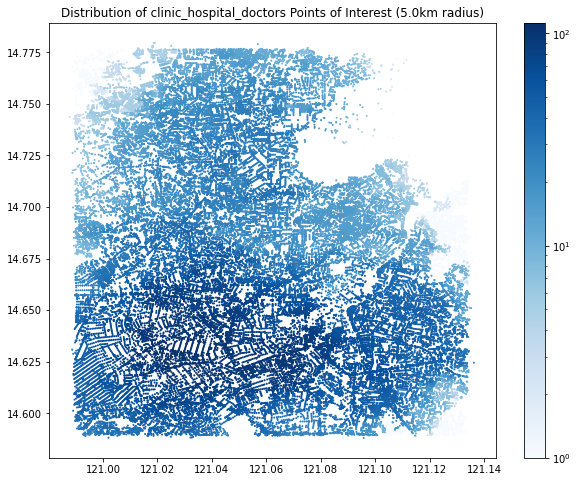

CPU times: user 1min 35s, sys: 702 ms, total: 1min 36s
Wall time: 19.6 s


In [44]:
%%time
# Hospitals and clinics

final_with_hospital_df, hospital_amenities_df, hospital_count_distance_df = get_OSM_network_data(network,
                     final_df[['longitude', "latitude"]].drop_duplicates(),
                     aoi_geojson,
                    ['clinic', 'hospital', 'doctors'],
                    5,
                    5000,
                    show_viz=True)

In [45]:
final_with_hospital_df.to_csv("final_with_hospital.csv", index=False)

In [46]:
final_with_hospital_df.describe()

,longitude,latitude,OSM_network_id,nearest_clinic_hospital_doctors_1,nearest_clinic_hospital_doctors_2,nearest_clinic_hospital_doctors_3,nearest_clinic_hospital_doctors_4,nearest_clinic_hospital_doctors_5,count_clinic_hospital_doctors_within_5.0km
count,134.000000,134.000000,1.340000e+02,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,121.040743,14.644861,2.271930e+09,828.962987,1121.121638,1308.585907,1476.831051,1611.708270,69.417910
std,0.027746,0.030190,3.196391e+09,698.616918,773.086920,780.715837,811.968663,826.542236,28.414573
min,120.988417,14.594756,2.426513e+07,0.000000,106.232002,161.205002,337.429993,446.610992,0.000000
25%,121.019832,14.625061,6.044738e+07,410.244492,656.928009,820.124496,955.716248,1095.543976,46.000000
50%,121.042128,14.635688,2.516937e+08,683.602509,982.009003,1158.948486,1304.273499,1484.715515,78.000000
75%,121.061947,14.656880,5.325035e+09,1055.275299,1413.947479,1565.109772,1730.152740,1828.615540,91.000000
max,121.109050,14.733172,9.267687e+09,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,108.000000


In [47]:
final_with_hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   longitude                                   134 non-null    float64
 1   latitude                                    134 non-null    float64
 2   OSM_network_id                              134 non-null    int64  
 3   nearest_clinic_hospital_doctors_1           134 non-null    float64
 4   nearest_clinic_hospital_doctors_2           134 non-null    float64
 5   nearest_clinic_hospital_doctors_3           134 non-null    float64
 6   nearest_clinic_hospital_doctors_4           134 non-null    float64
 7   nearest_clinic_hospital_doctors_5           134 non-null    float64
 8   count_clinic_hospital_doctors_within_5.0km  134 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 10.5 KB


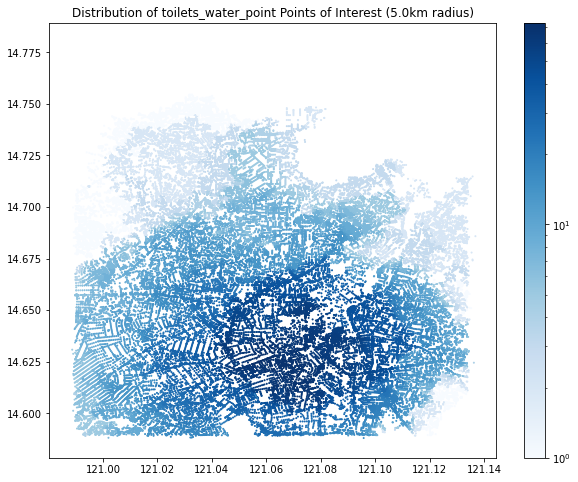

CPU times: user 1min 36s, sys: 966 ms, total: 1min 37s
Wall time: 18.3 s


In [48]:
%%time
# Water sources

final_with_hospital_with_water_df, hospital_with_water_amenities_df, hospital_with_water_count_distance_df = get_OSM_network_data(network,
                     final_with_hospital_df,
                     aoi_geojson,
                    ['toilets', 'water_point'],
                    5,
                    5000,
                    show_viz=True)

In [49]:
final_with_hospital_with_water_df.to_csv("final_with_hospital_with_water.csv", index=False)

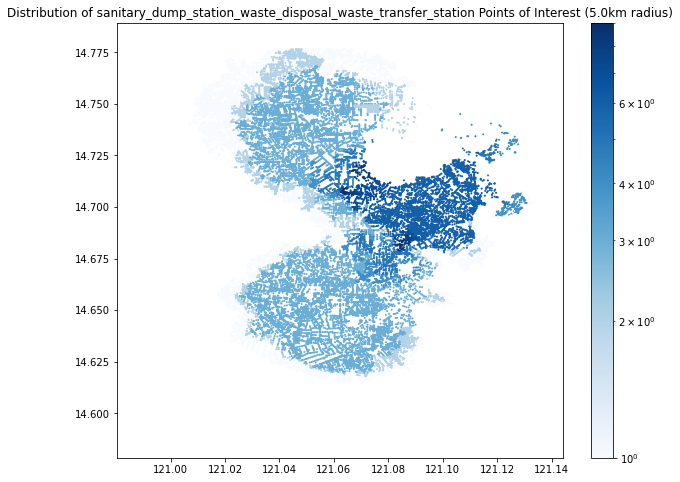

CPU times: user 1min 35s, sys: 847 ms, total: 1min 36s
Wall time: 20 s


In [50]:
%%time
# sanitation

sanitation_amenities = ['sanitary_dump_station', 'waste_disposal', 'waste_transfer_station']

final_with_hospital_with_water_san_df, hospital_with_water_san_amenities_df, hospital_with_water_san_count_distance_df = get_OSM_network_data(
                    network,
                    final_with_hospital_with_water_df,
                    aoi_geojson,
                    sanitation_amenities,
                    5,
                    5000,
                    show_viz=True)

In [51]:
final_with_hospital_with_water_san_df.to_csv("final_with_hospital_with_water_san.csv", index=False)

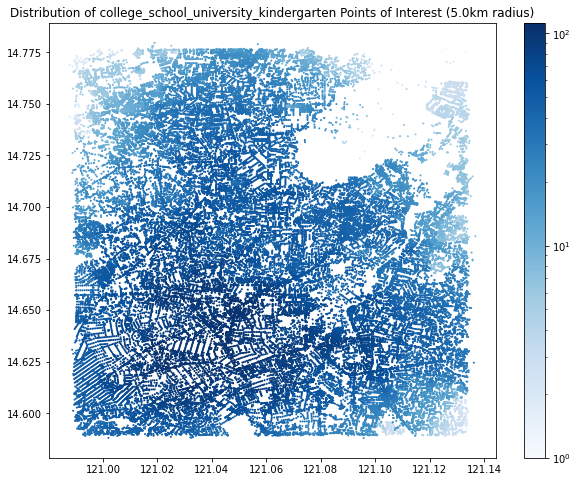

CPU times: user 1min 36s, sys: 742 ms, total: 1min 37s
Wall time: 22.9 s


In [52]:
%%time
# Schools

final_with_hospital_with_water_san_school_df, hospital_with_water_san_school_amenities_df, hospital_with_water_san_school_count_distance_df = get_OSM_network_data(
                    network,
                    final_with_hospital_with_water_san_df,
                    aoi_geojson,
                    ['college', 'school', 'university', 'kindergarten'],
                    5,
                    5000,
                    show_viz=True)

In [53]:
final_with_hospital_with_water_san_school_df.to_csv("final_with_hospital_with_water_san_school.csv", index=False)

### Merge Ground Truth and Features

In [54]:
final_with_hospital_with_water_san_school_df.columns

Index(['longitude', 'latitude', 'OSM_network_id',
       'nearest_clinic_hospital_doctors_1',
       'nearest_clinic_hospital_doctors_2',
       'nearest_clinic_hospital_doctors_3',
       'nearest_clinic_hospital_doctors_4',
       'nearest_clinic_hospital_doctors_5',
       'count_clinic_hospital_doctors_within_5.0km',
       'nearest_toilets_water_point_1', 'nearest_toilets_water_point_2',
       'nearest_toilets_water_point_3', 'nearest_toilets_water_point_4',
       'nearest_toilets_water_point_5',
       'count_toilets_water_point_within_5.0km',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_1',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_2',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_3',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_4',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_5',
       'count_sanitary_dump_station_waste_

In [55]:
ph_trans_df.columns

Index(['lon', 'lat', 'Date', 'Year', 'Month', 'Name', 'City', 'Binary',
       'medRisk', 'highRisk', 'date_from', 'date_to'],
      dtype='object')

In [61]:
merged_df = (ph_trans_df
             .merge(final_with_hospital_with_water_san_school_df, 
                            left_on=['lon', 'lat'], 
                            right_on=['longitude', 'latitude'])
             .merge(final_df.drop('OSM_network_id', axis=1), on=['longitude', 'latitude', 'date_from', 'date_to'])
            )

In [62]:
merged_df.shape

(4825, 50)

In [63]:
merged_df.head()

,lon,lat,Date,Year,Month,Name,City,Binary,medRisk,highRisk,date_from,date_to,longitude,latitude,OSM_network_id,nearest_clinic_hospital_doctors_1,nearest_clinic_hospital_doctors_2,nearest_clinic_hospital_doctors_3,nearest_clinic_hospital_doctors_4,nearest_clinic_hospital_doctors_5,count_clinic_hospital_doctors_within_5.0km,nearest_toilets_water_point_1,nearest_toilets_water_point_2,nearest_toilets_water_point_3,nearest_toilets_water_point_4,nearest_toilets_water_point_5,count_toilets_water_point_within_5.0km,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_1,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_2,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_3,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_4,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_5,count_sanitary_dump_station_waste_disposal_waste_transfer_station_within_5.0km,nearest_college_school_university_kindergarten_1,nearest_college_school_university_kindergarten_2,nearest_college_school_university_kindergarten_3,nearest_college_school_university_kindergarten_4,nearest_college_school_university_kindergarten_5,count_college_school_university_kindergarten_within_5.0km,geometry,buffered_geometry,ndvi,fapar,ndbi,ndwi,ndmi,aerosol,surface_temperature,precipitation_rate,relative_humidity
0,121.022904,14.660174,2016-01,2016,1,ALICIA,Quezon City,1,0,0,2016-01-01,2016-01-31,121.022904,14.660174,103789229,0.0,205.957993,420.481995,494.726013,790.182983,81.0,790.182983,1008.096985,1024.400024,1712.881958,1910.599976,16.0,4597.541992,5000.0,5000.0,5000.0,5000.0,1.0,559.606995,621.094971,695.721985,747.231018,831.344971,87.0,POINT (121.02290 14.66017),"ee.Geometry({\n ""functionInvocationValue"": {\...",0.069105,0.0,-0.009422,-0.072880,0.009422,224.000000,36.105789,2.139037e-09,75.675377
1,121.022904,14.660174,2016-02,2016,2,ALICIA,Quezon City,1,0,0,2016-02-01,2016-02-29,121.022904,14.660174,103789229,0.0,205.957993,420.481995,494.726013,790.182983,81.0,790.182983,1008.096985,1024.400024,1712.881958,1910.599976,16.0,4597.541992,5000.0,5000.0,5000.0,5000.0,1.0,559.606995,621.094971,695.721985,747.231018,831.344971,87.0,POINT (121.02290 14.66017),"ee.Geometry({\n ""functionInvocationValue"": {\...",0.088380,0.0,0.007069,-0.107384,-0.007069,96.000000,38.685275,1.882353e-07,71.514183
2,121.022904,14.660174,2016-03,2016,3,ALICIA,Quezon City,1,0,0,2016-03-01,2016-03-31,121.022904,14.660174,103789229,0.0,205.957993,420.481995,494.726013,790.182983,81.0,790.182983,1008.096985,1024.400024,1712.881958,1910.599976,16.0,4597.541992,5000.0,5000.0,5000.0,5000.0,1.0,559.606995,621.094971,695.721985,747.231018,831.344971,87.0,POINT (121.02290 14.66017),"ee.Geometry({\n ""functionInvocationValue"": {\...",0.040412,0.0,-0.039219,-0.011387,0.039219,192.849176,40.438409,1.428571e-08,70.926826
3,121.022904,14.660174,2016-06,2016,6,ALICIA,Quezon City,1,0,0,2016-06-01,2016-06-30,121.022904,14.660174,103789229,0.0,205.957993,420.481995,494.726013,790.182983,81.0,790.182983,1008.096985,1024.400024,1712.881958,1910.599976,16.0,4597.541992,5000.0,5000.0,5000.0,5000.0,1.0,559.606995,621.094971,695.721985,747.231018,831.344971,87.0,POINT (121.02290 14.66017),"ee.Geometry({\n ""functionInvocationValue"": {\...",0.037466,0.0,-0.061107,0.025286,0.061107,223.025381,42.088569,2.603659e-07,76.099548
4,121.022904,14.660174,2016-07,2016,7,ALICIA,Quezon City,1,0,0,2016-07-01,2016-07-31,121.022904,14.660174,103789229,0.0,205.957993,420.481995,494.726013,790.182983,81.0,790.182983,1008.096985,1024.400024,1712.881958,1910.599976,16.0,4597.541992,5000.0,5000.0,5000.0,5000.0,1.0,559.606995,621.094971,695.721985,747.231018,831.344971,87.0,POINT (121.02290 14.66017),"ee.Geometry({\n ""functionInvocationValue"": {\...",0.077250,0.0,-0.013293,-0.072541,0.013293,123.776650,40.402228,9.350649e-07,80.322510


In [64]:
merged_df.to_csv("final_merged_satellite_osm.csv", index=False)

### Trends

In [88]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

# PH-00 for Metro Manila, PH-14 for ARMM, etc. this is the reference: https://en.wikipedia.org/wiki/ISO_3166-2:PH
geo_tag = "PH-00" 

# Instantiate dengue payload with one keyword
pytrend.build_payload(kw_list=['dengue'], geo=geo_tag)

# Get all related queries (top and rising)
related_queries = pytrend.related_queries()

# Update payload with top related queries
list_to_search = ['dengue'] + related_queries['dengue']['top'].head(4)['query'].values.flatten().tolist()

# Add in ther dengue-related payloads
pytrend.build_payload(kw_list=list_to_search, geo=geo_tag)

historical_search_df = pytrend.interest_over_time()


In [89]:
historical_search_df.head(20)

,dengue,dengue symptoms,dengue fever,symptoms of dengue,dengue sintomas,isPartial
date,,,,,,
2017-02-05,7,3,1,1,0,False
2017-02-12,10,5,1,2,1,False
2017-02-19,9,3,3,0,0,False
2017-02-26,7,1,2,1,1,False
2017-03-05,12,4,1,2,2,False
2017-03-12,7,1,1,0,1,False
2017-03-19,7,4,1,1,1,False
2017-03-26,7,1,2,0,1,False
2017-04-02,4,1,1,0,1,False


In [90]:
historical_search_df.tail(20)

,dengue,dengue symptoms,dengue fever,symptoms of dengue,dengue sintomas,isPartial
date,,,,,,
2021-09-12,17,2,3,0,1,False
2021-09-19,12,3,1,1,1,False
2021-09-26,6,1,0,0,1,False
2021-10-03,5,1,0,0,0,False
2021-10-10,9,1,0,0,0,False
2021-10-17,9,1,0,0,0,False
2021-10-24,9,1,0,0,0,False
2021-10-31,5,1,1,0,0,False
2021-11-07,8,1,1,0,0,False


In [98]:
print(historical_search_df.tail(20).to_markdown())

| date                |   dengue |   dengue symptoms |   dengue fever |   symptoms of dengue |   dengue sintomas | isPartial   |
|:--------------------|---------:|------------------:|---------------:|---------------------:|------------------:|:------------|
| 2021-09-12 00:00:00 |       17 |                 2 |              3 |                    0 |                 1 | False       |
| 2021-09-19 00:00:00 |       12 |                 3 |              1 |                    1 |                 1 | False       |
| 2021-09-26 00:00:00 |        6 |                 1 |              0 |                    0 |                 1 | False       |
| 2021-10-03 00:00:00 |        5 |                 1 |              0 |                    0 |                 0 | False       |
| 2021-10-10 00:00:00 |        9 |                 1 |              0 |                    0 |                 0 | False       |
| 2021-10-17 00:00:00 |        9 |                 1 |              0 |                    0 |   

<AxesSubplot:xlabel='date'>

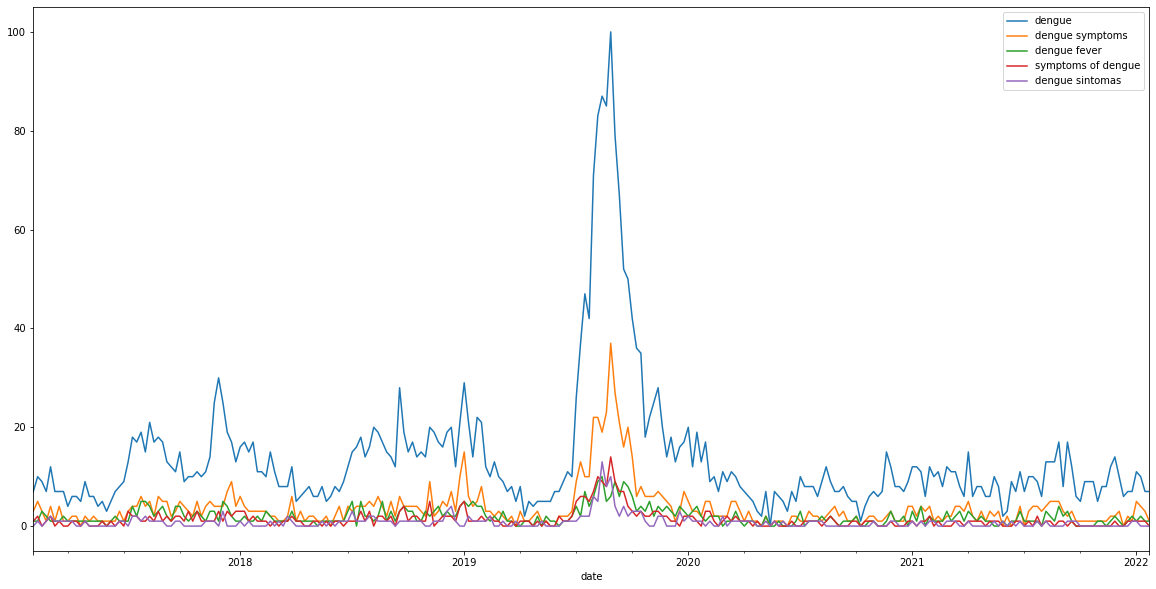

In [91]:
historical_search_df.plot(figsize=(20, 10))

In [78]:
pd.to_datetime(ph_trans_df.date_from).dt.year.min()

2016

In [79]:
year_start_gt = pd.to_datetime(ph_trans_df.date_from).dt.year.min()
month_start_gt = pd.to_datetime(ph_trans_df.date_from).dt.month.min()
day_start_gt = pd.to_datetime(ph_trans_df.date_from).dt.day.min()

year_end_iot = historical_search_df.index.min().year
month_end_iot = historical_search_df.index.min().month
day_end_iot = historical_search_df.index.min().day

In [80]:
year_start_gt, month_start_gt, day_start_gt

(2016, 1, 1)

In [94]:
from aedes.social_listening_utils import get_search_trends

In [95]:
search_df = get_search_trends("PH-00")

In [104]:
monthly_max_interest_df = search_df.resample('M').max().reset_index()
monthly_max_interest_df['date'] = monthly_max_interest_df['date'].astype(str)
monthly_max_interest_df

,date,dengue,dengue symptoms,dengue fever,symptoms of dengue,dengue sintomas,isPartial
0,2017-02-28,10,5,3,2,1,False
1,2017-03-31,12,4,2,2,2,False
2,2017-04-30,9,2,1,1,1,False
3,2017-05-31,6,2,1,1,0,False
4,2017-06-30,8,3,2,1,1,False
5,2017-07-31,19,6,5,3,2,False
6,2017-08-31,21,6,5,3,2,False
7,2017-09-30,17,5,4,2,1,False
8,2017-10-31,15,5,4,3,1,False
9,2017-11-30,25,5,3,1,1,False


In [106]:
(merged_df
 .merge(monthly_max_interest_df, 
        left_on='date_to', 
        right_on='date')
.to_csv("final_merged_satellite_osm_social_listening.csv", index=False)
)

In [107]:
(merged_df
 .merge(monthly_max_interest_df, 
        left_on='date_to', 
        right_on='date')
 .astype(str)
.to_csv("final_merged_satellite_osm_social_listening_all_str.csv", index=False)
)

In [108]:
(merged_df
 .merge(monthly_max_interest_df, 
        left_on='date_to', 
        right_on='date')
 .astype(str)
.to_json("final_merged_satellite_osm_social_listening.json")
)

### Full Modelable Data

In [109]:
full_df = (merged_df
 .merge(monthly_max_interest_df, 
        left_on='date_to', 
        right_on='date'))

In [110]:
full_df.head()

,lon,lat,Date,Year,Month,Name,City,Binary,medRisk,highRisk,date_from,date_to,longitude,latitude,OSM_network_id,nearest_clinic_hospital_doctors_1,nearest_clinic_hospital_doctors_2,nearest_clinic_hospital_doctors_3,nearest_clinic_hospital_doctors_4,nearest_clinic_hospital_doctors_5,count_clinic_hospital_doctors_within_5.0km,nearest_toilets_water_point_1,nearest_toilets_water_point_2,nearest_toilets_water_point_3,nearest_toilets_water_point_4,nearest_toilets_water_point_5,count_toilets_water_point_within_5.0km,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_1,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_2,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_3,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_4,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_5,count_sanitary_dump_station_waste_disposal_waste_transfer_station_within_5.0km,nearest_college_school_university_kindergarten_1,nearest_college_school_university_kindergarten_2,nearest_college_school_university_kindergarten_3,nearest_college_school_university_kindergarten_4,nearest_college_school_university_kindergarten_5,count_college_school_university_kindergarten_within_5.0km,geometry,buffered_geometry,ndvi,fapar,ndbi,ndwi,ndmi,aerosol,surface_temperature,precipitation_rate,relative_humidity,date,dengue,dengue symptoms,dengue fever,symptoms of dengue,dengue sintomas,isPartial
0,121.022904,14.660174,2017-02,2017,2,ALICIA,Quezon City,1,0,0,2017-02-01,2017-02-28,121.022904,14.660174,103789229,0.000000,205.957993,420.481995,494.726013,790.182983,81.0,790.182983,1008.096985,1024.400024,1712.881958,1910.599976,16.0,4597.541992,5000.000000,5000.000000,5000.0,5000.0,1.0,559.606995,621.094971,695.721985,747.231018,831.344971,87.0,POINT (121.02290 14.66017),"ee.Geometry({\n ""functionInvocationValue"": {\...",0.094524,0.0,0.007867,-0.111456,-0.007867,96.000000,37.239718,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
1,121.066004,14.632222,2017-02,2017,2,AMIHAN,Quezon City,1,0,0,2017-02-01,2017-02-28,121.066004,14.632222,26082703,1346.633057,1401.713013,1492.427979,1669.797974,1700.068970,95.0,582.395996,1111.155029,1198.838989,1450.887939,1514.406982,68.0,3301.218018,3386.823975,3453.082031,5000.0,5000.0,3.0,508.674011,548.835999,691.718018,711.604004,711.604004,88.0,POINT (121.06600 14.63222),"ee.Geometry({\n ""functionInvocationValue"": {\...",0.109450,0.0,-0.017016,-0.097162,0.017016,87.530303,36.324251,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
2,121.004975,14.654071,2017-02,2017,2,APOLONIO SAMSON,Quezon City,1,0,0,2017-02-01,2017-02-28,121.004975,14.654071,6505199720,1702.234985,1793.422974,2031.962036,2076.774902,2081.985107,53.0,1660.015015,1940.066040,2605.147949,2605.208984,2627.989990,8.0,5000.000000,5000.000000,5000.000000,5000.0,5000.0,0.0,480.135010,763.270996,772.906006,1561.592041,1939.073975,59.0,POINT (121.00498 14.65407),"ee.Geometry({\n ""functionInvocationValue"": {\...",0.079648,0.0,0.021071,-0.109372,-0.021071,91.876419,37.406439,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
3,121.005814,14.616177,2017-02,2017,2,AURORA,Quezon City,1,0,0,2017-02-01,2017-02-28,121.005814,14.616177,61090340,414.967010,486.903015,612.750977,697.668030,716.406982,64.0,596.807983,1506.578979,1676.605957,2904.345947,3683.301025,13.0,5000.000000,5000.000000,5000.000000,5000.0,5000.0,0.0,243.177994,527.648987,760.955994,830.559021,938.570007,75.0,POINT (121.00581 14.61618),"ee.Geometry({\n ""functionInvocationValue"": {\...",0.073563,0.0,0.022185,-0.108136,-0.022185,95.922978,37.321038,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
4,121.011184,14.667379,2017-02,2017,2,BAESA,Quezon City,1,0,0,2017-02-01,2017-02-28,121.011184,14.667379,5883944836,432.587006,601.387024,1313.385010,1412.119995,1672.917969,37.0,2270.043945,2356.544922,3012.438965,3107.483887,3492.186035,10.0,5000.000000,5000.000000,5000.000000,5000.0,5000.0,0.0,610.987976,696.262024,1047.875000,1121.114990,1

In [111]:
full_df.describe()

,lon,lat,Year,Month,Binary,medRisk,highRisk,longitude,latitude,OSM_network_id,nearest_clinic_hospital_doctors_1,nearest_clinic_hospital_doctors_2,nearest_clinic_hospital_doctors_3,nearest_clinic_hospital_doctors_4,nearest_clinic_hospital_doctors_5,count_clinic_hospital_doctors_within_5.0km,nearest_toilets_water_point_1,nearest_toilets_water_point_2,nearest_toilets_water_point_3,nearest_toilets_water_point_4,nearest_toilets_water_point_5,count_toilets_water_point_within_5.0km,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_1,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_2,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_3,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_4,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_5,count_sanitary_dump_station_waste_disposal_waste_transfer_station_within_5.0km,nearest_college_school_university_kindergarten_1,nearest_college_school_university_kindergarten_2,nearest_college_school_university_kindergarten_3,nearest_college_school_university_kindergarten_4,nearest_college_school_university_kindergarten_5,count_college_school_university_kindergarten_within_5.0km,ndvi,fapar,ndbi,ndwi,ndmi,aerosol,surface_temperature,precipitation_rate,relative_humidity,dengue,dengue symptoms,dengue fever,symptoms of dengue,dengue sintomas
count,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3.083000e+03,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,2467.000000,2.968000e+03,2968.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000
mean,121.040753,14.644881,2017.521894,6.781382,0.772624,0.138177,0.052546,121.040753,14.644881,2.273046e+09,828.752633,1120.930292,1308.591798,1476.837029,1611.893371,69.403179,1203.321625,1659.245952,2125.258886,2436.810128,2636.612971,31.849173,4085.459367,4318.251104,4415.534472,4909.969834,4925.563714,1.486863,606.677150,865.763265,1059.982901,1234.293240,1400.128875,74.895881,0.078548,0.002471,-0.065588,-0.016682,0.065588,169.209929,38.489355,1.230936e-05,73.110719,16.346091,4.955563,3.042815,2.303925,1.434966
std,0.027648,0.030096,0.499601,3.349366,0.419205,0.345142,0.223162,0.027648,0.030096,3.185045e+09,696.103251,770.270141,777.797332,808.933324,823.516484,28.320165,937.235519,988.151231,1155.591017,1212.811611,1224.204922,24.566698,1252.109227,1067.801964,977.282818,495.715578,412.101518,1.663462,574.496558,587.134750,628.801116,635.793728,646.475454,21.758613,0.048153,0.009973,0.085606,0.118770,0.085606,43.796919,3.019544,2.927043e-05,5.760957,6.806106,2.197051,1.398566,1.195685,0.876122
min,120.988417,14.594756,2017.000000,1.000000,0.000000,0.000000,0.000000,120.988417,14.594756,2.426513e+07,0.000000,106.232002,161.205002,337.429993,446.610992,0.000000,37.874001,181.750000,361.131989,649.051025,821.405029,0.000000,200.248993,875.088013,1106.292969,1237.760010,1545.834961,0.000000,0.000000,241.697006,288.397003,476.610992,574.348022,0.000000,-0.009398,0.000000,-0.455895,-0.173172,-0.035758,85.683944,25.655123,0.000000e+00,61.653557,6.000000,2.000000,1.000000,1.000000,0.000000
25%,121.019721,14.625055,2017.000000,4.000000,1.000000,0.000000,0.000000,121.019721,14.625055,6.044686e+07,408.937988,656.330017,817.112000,952.179993,1093.188965,45.000000,582.395996,981.184021,1257.917969,1426.738037,1546.590942,10.000000,3284.263916,3809.516113,4054.364990,5000.000000,5000.000000,0.000000,317.554993,542.956970,698.476013,878.846008,1012.565002,58.000000,0.045107,0.000000,-0.083662,-0.096243,0.011425,132.612369,36.296972,0.000000e+00,68.507233,10.000000,3.000000,2.000000,1.000000,1.000000
50%,121.042858,14

In [113]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3083 entries, 0 to 3082
Data columns (total 57 columns):
 #   Column                                                                          Non-Null Count  Dtype   
---  ------                                                                          --------------  -----   
 0   lon                                                                             3083 non-null   float64 
 1   lat                                                                             3083 non-null   float64 
 2   Date                                                                            3083 non-null   object  
 3   Year                                                                            3083 non-null   int64   
 4   Month                                                                           3083 non-null   int64   
 5   Name                                                                            3083 non-null   object  
 6   City    

# Prepare Data for Modelling

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [21]:
data = pd.read_csv("final_merged_satellite_osm_social_listening.csv")

In [22]:
train = data.sample(frac=0.75, random_state=42)
test = data.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [23]:
train.shape, test.shape

((2312, 57), (771, 57))

In [24]:
data.head(2)

,lon,lat,Date,Year,Month,Name,City,Binary,medRisk,highRisk,date_from,date_to,longitude,latitude,OSM_network_id,nearest_clinic_hospital_doctors_1,nearest_clinic_hospital_doctors_2,nearest_clinic_hospital_doctors_3,nearest_clinic_hospital_doctors_4,nearest_clinic_hospital_doctors_5,count_clinic_hospital_doctors_within_5.0km,nearest_toilets_water_point_1,nearest_toilets_water_point_2,nearest_toilets_water_point_3,nearest_toilets_water_point_4,nearest_toilets_water_point_5,count_toilets_water_point_within_5.0km,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_1,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_2,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_3,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_4,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_5,count_sanitary_dump_station_waste_disposal_waste_transfer_station_within_5.0km,nearest_college_school_university_kindergarten_1,nearest_college_school_university_kindergarten_2,nearest_college_school_university_kindergarten_3,nearest_college_school_university_kindergarten_4,nearest_college_school_university_kindergarten_5,count_college_school_university_kindergarten_within_5.0km,geometry,buffered_geometry,ndvi,fapar,ndbi,ndwi,ndmi,aerosol,surface_temperature,precipitation_rate,relative_humidity,date,dengue,dengue symptoms,dengue fever,symptoms of dengue,dengue sintomas,isPartial
0,121.022904,14.660174,2017-02,2017,2,ALICIA,Quezon City,1,0,0,2017-02-01,2017-02-28,121.022904,14.660174,103789229,0.000000,205.957993,420.481995,494.726013,790.182983,81.0,790.182983,1008.096985,1024.400024,1712.881958,1910.599976,16.0,4597.541992,5000.000000,5000.000000,5000.0,5000.0,1.0,559.606995,621.094971,695.721985,747.231018,831.344971,87.0,POINT (121.0229038030017 14.66017419402457),"ee.Geometry({\n ""functionInvocationValue"": {\...",0.094524,0.0,0.007867,-0.111456,-0.007867,96.000000,37.239718,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
1,121.066004,14.632222,2017-02,2017,2,AMIHAN,Quezon City,1,0,0,2017-02-01,2017-02-28,121.066004,14.632222,26082703,1346.633057,1401.713013,1492.427979,1669.797974,1700.068970,95.0,582.395996,1111.155029,1198.838989,1450.887939,1514.406982,68.0,3301.218018,3386.823975,3453.082031,5000.0,5000.0,3.0,508.674011,548.835999,691.718018,711.604004,711.604004,88.0,POINT (121.0660037722082 14.63222231163894),"ee.Geometry({\n ""functionInvocationValue"": {\...",0.109450,0.0,-0.017016,-0.097162,0.017016,87.530303,36.324251,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False


### Nowcasting

In [25]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_cols = data.select_dtypes(include=numerics).columns
# numerical_cols

In [42]:
target = 'Binary'
ignore_cols = ['Date', 'City', 'Name', 'highRisk', 'medRisk', 'date_from', 'date_to', 'longitude', 'latitude',
               'isPartial', 'date', 'geometry', 'buffered_geometry', 'OSM_network_id'] + [i for i in data.columns if 'nearest' in i]
numerical_features = [i for i in numerical_cols if not i in ignore_cols and not "nearest" in i].remove(target)
# numerical_features

In [27]:
train.Binary.value_counts() / train.shape[0]

1    0.769896
0    0.230104
Name: Binary, dtype: float64

### Month-ahead Foreacasting

In [29]:
from datetime import datetime, timedelta

In [30]:
# create labels for dates 30 days prior
data['date_from'] = pd.to_datetime(data['date_from'])
data['date_from_30_days_from_now'] = data['date_from'].apply(lambda x: x + timedelta(30))

In [31]:
# Merge dates and location to get labels 30 days into the future
future_risk_labels_df = (data[['lon', 'lat', 'date_from_30_days_from_now']]
                         .merge(data[['lon', 'lat', 'date_from', 'Binary', 'medRisk', 'highRisk']],
                                                    left_on=['lon', 'lat', 'date_from_30_days_from_now'],
                                                    right_on=['lon', 'lat', 'date_from'])
                         .drop('date_from_30_days_from_now', axis=1)
                        )
future_risk_labels_df.columns = ['lon', 'lat', 'date_from', 'Binary_in_30_days', 'medRisk_in_30_days', 'highRisk_in_30_days']

In [33]:
data_future_df = data.merge(future_risk_labels_df, on=['lon', 'lat', 'date_from'])

In [34]:
train_future = data_future_df.sample(frac=0.75, random_state=42)
test_future = data_future_df.drop(train_future.index)
train_future.reset_index(inplace=True, drop=True)
test_future.reset_index(inplace=True, drop=True)

In [35]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_future_cols = data_future_df.select_dtypes(include=numerics).columns
# numerical_cols

In [36]:
data_future_df.columns

Index(['lon', 'lat', 'Date', 'Year', 'Month', 'Name', 'City', 'Binary',
       'medRisk', 'highRisk', 'date_from', 'date_to', 'longitude', 'latitude',
       'OSM_network_id', 'nearest_clinic_hospital_doctors_1',
       'nearest_clinic_hospital_doctors_2',
       'nearest_clinic_hospital_doctors_3',
       'nearest_clinic_hospital_doctors_4',
       'nearest_clinic_hospital_doctors_5',
       'count_clinic_hospital_doctors_within_5.0km',
       'nearest_toilets_water_point_1', 'nearest_toilets_water_point_2',
       'nearest_toilets_water_point_3', 'nearest_toilets_water_point_4',
       'nearest_toilets_water_point_5',
       'count_toilets_water_point_within_5.0km',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_1',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_2',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_3',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_4',
   

In [41]:
target_future = 'Binary_in_30_days'
ignore_future_cols = ['Date', 'City', 'Name', 'Binary', 'highRisk', 'medRisk', 'date_from', 'date_to', 'longitude', 'latitude',
               'isPartial', 'date', 'geometry', 'buffered_geometry', 'OSM_network_id',
               'medRisk_in_30_days', 'highRisk_in_30_days','date_from_30_days_from_now',
               'date'
              ] + [i for i in data_future_df.columns if 'nearest' in i
                  ] + [i for i in data_future_df.columns if 'count' in i]
numerical_future_features = [i for i in numerical_future_cols if not i in ignore_future_cols and not "nearest" in i and not "count" in i].remove(target)
# numerical_features

### AEDEDS AutoML

In [43]:
X_train = train[numerical_cols].drop(['Binary', 'medRisk', 'highRisk', 'OSM_network_id'], axis=1)
y_train = train[[target]]
X_test = test[numerical_cols].drop(['Binary', 'medRisk', 'highRisk', 'OSM_network_id'], axis=1)
y_test = test[[target]]

In [44]:
X_train.columns

Index(['lon', 'lat', 'Year', 'Month', 'longitude', 'latitude',
       'nearest_clinic_hospital_doctors_1',
       'nearest_clinic_hospital_doctors_2',
       'nearest_clinic_hospital_doctors_3',
       'nearest_clinic_hospital_doctors_4',
       'nearest_clinic_hospital_doctors_5',
       'count_clinic_hospital_doctors_within_5.0km',
       'nearest_toilets_water_point_1', 'nearest_toilets_water_point_2',
       'nearest_toilets_water_point_3', 'nearest_toilets_water_point_4',
       'nearest_toilets_water_point_5',
       'count_toilets_water_point_within_5.0km',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_1',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_2',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_3',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_4',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_5',
       'count_sanitary_dump_s

In [45]:
from aedes.automl_utils import perform_classification

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8843535014802587

Generation 2 - Current best internal CV score: 0.8843535014802587

Generation 3 - Current best internal CV score: 0.8843535014802587

Generation 4 - Current best internal CV score: 0.8864553009627576

Generation 5 - Current best internal CV score: 0.8864553009627576

Generation 6 - Current best internal CV score: 0.8864553009627576

Generation 7 - Current best internal CV score: 0.8864553009627576

Generation 8 - Current best internal CV score: 0.8864553009627576

Generation 9 - Current best internal CV score: 0.8864553009627576

Generation 10 - Current best internal CV score: 0.8878974089575988

Generation 11 - Current best internal CV score: 0.8880632929786818

Generation 12 - Current best internal CV score: 0.889950753668092

Generation 13 - Current best internal CV score: 0.889950753668092

Generation 14 - Current best internal CV score: 0.889950753668092

Generation 15 - Current best internal CV score: 0.889950753

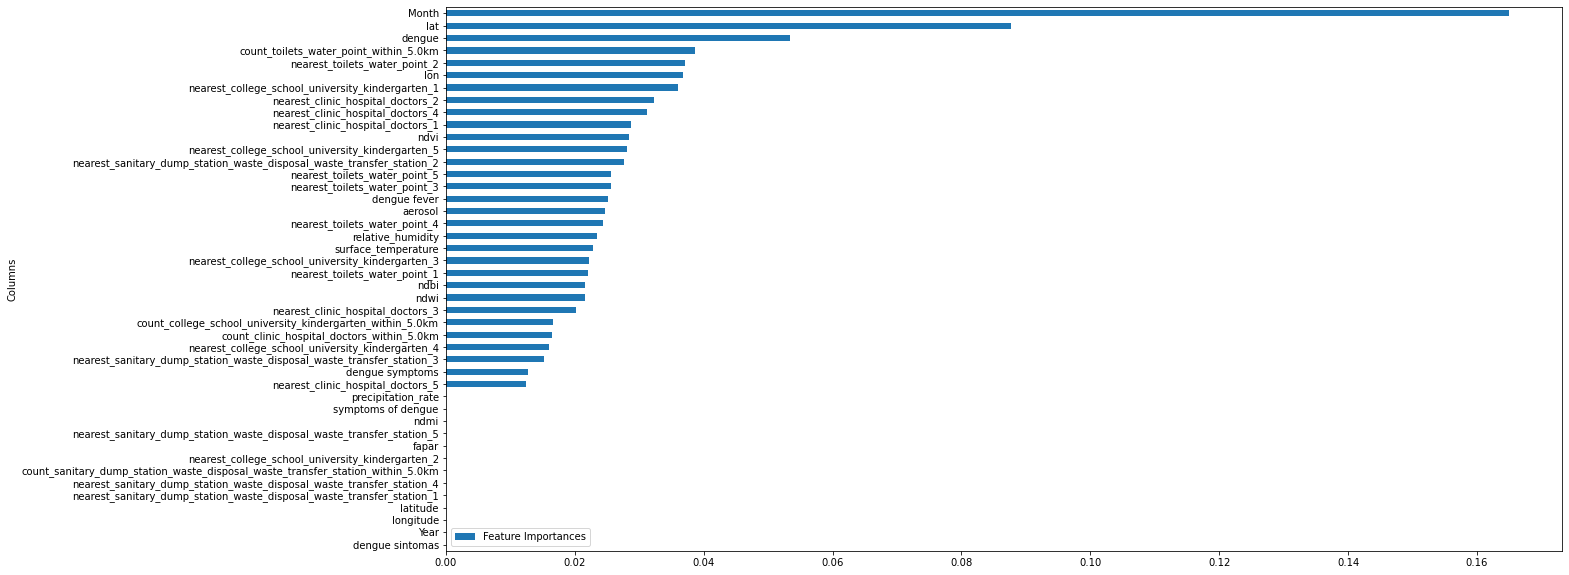

In [47]:
model, feature_imps_df = perform_classification(X_train, y_train)